# Dog Breed Classification
### Abe Eyman Casey & Sameer Patel
##### Reproducable Models

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import keras
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
train_path = 'data/train'
train_size = len(os.listdir(train_path))
print("Number of pictures: %s" % train_size)

Number of pictures: 10222


In [3]:
labels_df = pd.read_csv('data/labels.csv')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
all_breeds = labels_df.sort_values(by = "breed").filter(['breed']).drop_duplicates().reset_index(drop = True)
print('Number of dog breeds: %s' % len(all_breeds.breed))
pd.set_option('display.min_rows', 120)
pd.set_option('display.max_rows', 120)

Number of dog breeds: 120


In [5]:
all_breeds

,breed
0,affenpinscher
1,afghan_hound
2,african_hunting_dog
3,airedale
4,american_staffordshire_terrier
5,appenzeller
6,australian_terrier
7,basenji
8,basset
9,beagle


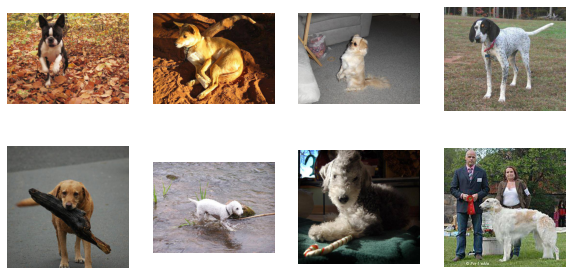

In [6]:
example_pics = os.listdir(train_path)
fig = plt.figure(figsize = (10,5))

for i in range(8):
    plt.subplot(2, 4, i+1)
    img = plt.imread(os.path.join(train_path, example_pics[i]))
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.axis('off')

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255.,
                                  horizontal_flip = True,
                                  validation_split=0.02 
                                  )

In [8]:
train_df = pd.read_csv('data/preprocessed_saves/our_train.csv')
test_df = pd.read_csv('data/preprocessed_saves/our_test.csv')
img_size = (331, 331)

In [9]:
train_df.shape

(8178, 3)

In [10]:
test_df.shape

(2044, 3)

#### Splitting data

In [11]:
train_generator=train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_path,
    x_col = "id",
    y_col = "breed",
    subset = "training",
    seed = 13,
    shuffle = True,
    class_mode = "categorical",
    target_size = img_size,
    color_mode = "rgb" 
)

Found 8015 validated image filenames belonging to 120 classes.


In [12]:
train_x, train_y = next(train_generator)

In [13]:
def show_preview(image_list, nrows = 3, ncols = 3, figsize = (10, 10), showaxis='off'):
    fig = plt.figure(None, figsize, frameon=False)
    grid = ImageGrid(fig, 111,
                     nrows_ncols = (nrows, ncols), 
                     axes_pad = 0.1, 
                     share_all = True)
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i], cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')

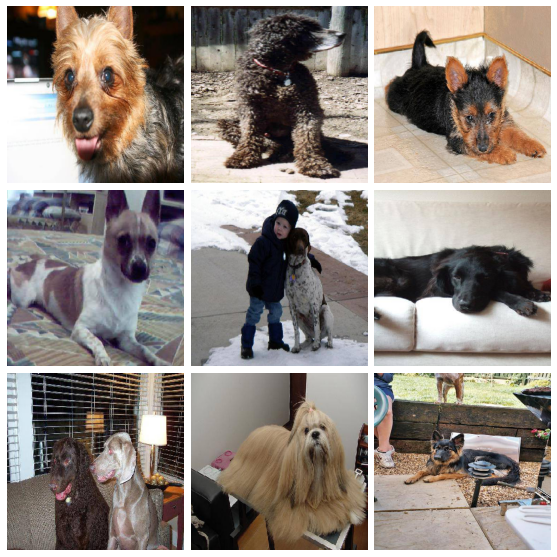

In [14]:
show_preview(train_x)

In [15]:
valid_generator=train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_path,
    x_col = "id",
    y_col = "breed",
    subset = "validation",
    seed = 13,
    shuffle = True,
    class_mode="categorical",
    target_size = img_size,
    color_mode = "rgb"
)

Found 163 validated image filenames belonging to 120 classes.


In [16]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = train_path,
    x_col="id",
    y_col = None,
    seed = 13,
    shuffle = False,
    class_mode = None,
    target_size = img_size,
    color_mode="rgb"
)

Found 2044 validated image filenames.


In [17]:
shape = (331, 331, 3)

In [18]:
reconstructed_model = keras.models.load_model("data/trained_model")

In [19]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d (Gl (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               483960    
Total params: 85,400,778
Trainable params: 85,204,110
Non-trainable params: 196,668
_________________________________________________________________


In [20]:
score = reconstructed_model.evaluate(valid_generator)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ", score[0])

6/6 [==============================] - 55s 9s/step - loss: 0.5673 - accuracy: 0.9325
Accuracy: 93.25%
Loss:  0.567319393157959


In [21]:
%%time
pred = reconstructed_model.predict(test_generator)

CPU times: user 35min 23s, sys: 27min 1s, total: 1h 2min 24s
Wall time: 15min 30s


In [22]:
predicted_df = pd.DataFrame(pred, columns = all_breeds.breed)
predicted_df.head()

breed,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0.004197,0.006534,0.003837,0.002098,0.004739,0.003312,0.002676,0.005304,0.001970,0.002937,...,0.010476,0.016057,0.004408,0.002663,0.003131,0.002859,0.009770,0.004098,0.003049,0.011944
1,0.002260,0.002659,0.002142,0.003769,0.002900,0.002411,0.005332,0.004167,0.002633,0.003169,...,0.003907,0.003577,0.003075,0.003557,0.003635,0.002860,0.002474,0.003709,0.002692,0.002636
2,0.001054,0.003544,0.003084,0.003451,0.001087,0.001233,0.001211,0.000963,0.001427,0.001637,...,0.000912,0.000856,0.002033,0.003121,0.000987,0.000894,0.000782,0.000922,0.004867,0.000767
3,0.004214,0.002683,0.001646,0.004768,0.002115,0.003199,0.001861,0.005518,0.001515,0.001936,...,0.001959,0.001302,0.001647,0.001861,0.001505,0.002600,0.002262,0.002162,0.005202,0.001405
4,0.004940,0.003926,0.004086,0.003022,0.002438,0.001651,0.004846,0.004564,0.002899,0.002828,...,0.007762,0.003666,0.002154,0.003053,0.002312,0.002039,0.004106,0.002861,0.003046,0.002788


In [23]:
final_preds = predicted_df.idxmax(axis=1)
final_preds[1:10]

1          shetland_sheepdog
2                 otterhound
3            giant_schnauzer
4                groenendael
5        african_hunting_dog
6    wire-haired_fox_terrier
7                     basset
8                 schipperke
9                 bloodhound
dtype: object

In [24]:
predicted_df['german_shepherd'].idxmax()

287

In [25]:
final_pred_df = test_df.copy()
final_pred_df.reset_index(drop = True, inplace = True)
final_pred_df['predicted_breed'] = final_preds
final_pred_df.drop(columns = ["Unnamed: 0"], inplace = True)
final_pred_df.head()

,id,breed,predicted_breed
0,001cdf01b096e06d78e9e5112d419397.jpg,pekinese,pekinese
1,004396df1acd0f1247b740ca2b14616e.jpg,shetland_sheepdog,shetland_sheepdog
2,008ba178d6dfc1a583617470d19c1673.jpg,otterhound,otterhound
3,00fda6ecca54efbac26e907be4b0b78b.jpg,giant_schnauzer,giant_schnauzer
4,010e87fdf252645a827e37470e65e842.jpg,groenendael,groenendael


In [26]:
misclassified_tot = final_pred_df.query("breed != predicted_breed").shape[0]
correct_tot = final_pred_df.query("breed == predicted_breed").shape[0]
total_attempted = final_pred_df.shape[0]
print(f"Correctly classified {correct_tot}/{total_attempted} dog breeds leaving {misclassified_tot} misclassified.")

Correctly classified 1900/2044 dog breeds leaving 144 misclassified.


#### Take top 5 possible dog breeds

In [27]:
def get_top_five(row, plot = True):
    if(plot == True):
        fig = plt.figure(figsize = (10,5))
        img = plt.imread(os.path.join(train_path, test_df.iloc[[row]]['id'].values[0]))
        plt.imshow(img, cmap = plt.get_cmap('gray'))
        plt.axis('off')
    return (predicted_df.reset_index().set_index(['index'])
       .rename_axis(['breed'], axis=1)
       .stack()
       .unstack('index')
       .reset_index()
       .filter(['breed', row])
       .sort_values(by = (row), ascending = False)
       .rename(columns = {row : 'probability'})
       .head())

In [28]:
final_pred_df.head()

,id,breed,predicted_breed
0,001cdf01b096e06d78e9e5112d419397.jpg,pekinese,pekinese
1,004396df1acd0f1247b740ca2b14616e.jpg,shetland_sheepdog,shetland_sheepdog
2,008ba178d6dfc1a583617470d19c1673.jpg,otterhound,otterhound
3,00fda6ecca54efbac26e907be4b0b78b.jpg,giant_schnauzer,giant_schnauzer
4,010e87fdf252645a827e37470e65e842.jpg,groenendael,groenendael


index,breed,probability
85,pekinese,0.356235
87,pomeranian,0.030915
61,japanese_spaniel,0.030226
100,shih-tzu,0.024518
29,chihuahua,0.022945


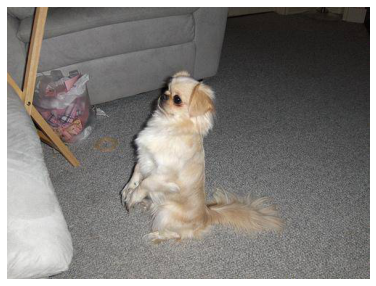

In [29]:
get_top_five(0)

index,breed,probability
99,shetland_sheepdog,0.597826
33,collie,0.031266
84,papillon,0.009141
60,italian_greyhound,0.008906
86,pembroke,0.006380


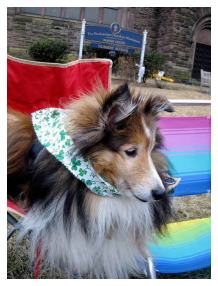

In [30]:
get_top_five(1)

index,breed,probability
46,german_shepherd,0.763059
63,kelpie,0.007756
72,malinois,0.005132
54,groenendael,0.005015
37,dingo,0.004923


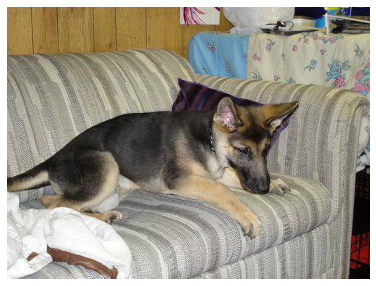

In [31]:
get_top_five(287)

In [32]:
def check_top_five(index):
    return final_pred_df.breed[index] in get_top_five(index, plot = False).breed.to_list()


In [33]:
%%time
final_pred_df['top_five_correct'] = final_pred_df.reset_index()['index'].apply(check_top_five)

CPU times: user 1min 17s, sys: 281 ms, total: 1min 17s
Wall time: 1min 17s


In [34]:
final_pred_df['top_five_correct'].value_counts()

True     2039
False       5
Name: top_five_correct, dtype: int64

In [35]:
misclassified_tot = final_pred_df.query("top_five_correct == False").shape[0]
correct_tot = final_pred_df.query("top_five_correct == True").shape[0]
total_attempted = final_pred_df.shape[0]
print(f"Correctly selected the correct dog breed in one of the top five predicted for {correct_tot}/{total_attempted} pictures leaving {misclassified_tot} incorrect.")

Correctly selected the correct dog breed in one of the top five predicted for 2039/2044 pictures leaving 5 incorrect.


In [36]:
2039/2044

0.9975538160469667